In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [6]:
ee = solar.groupby(['hour']).mean().target

ee[:7] = 0
ee[20:] = 0
ee = ee * 2.5

In [7]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [8]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [9]:
df.date_time = pd.to_datetime(df.date_time)

In [10]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [11]:
days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

In [12]:
eda_df['month'] = eda_df.date_time.dt.month
eda_df['hour'] = eda_df.date_time.dt.hour
eda_df['year'] = eda_df.date_time.dt.year
eda_df['day'] = eda_df.date_time.dt.day

In [13]:
eda_df['요일'] = eda_df.date_time.dt.weekday

In [14]:
eda_df = eda_df[eda_df['요일'] < 6]

In [15]:
eda_df['요일'] = eda_df['date_time'].dt.weekday.map(days)

In [16]:
from math import *
import random
import sys

In [17]:
summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 137.7, 137.7,
                137.7, 137.7, 84.8, 84.8]

normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 107.3, 107.3,
                107.3, 107.3, 84.8, 84.8]

winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 137.9,
                137.9, 137.9, 91.8, 91.8]

winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

other_max = [11, 13, 14, 15, 16, 17]
other_mid = [8, 9, 10, 12, 18, 19, 20, 21]
other_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

price_dict = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}

time_dict = {"winter_max": winter_max, "winter_mid": winter_mid, "winter_min": winter_min,
             "spring_max": other_max, "spring_mid": other_mid, "spring_min": other_min}


In [18]:
class Particle:
    def __init__(self, max_iter, initial_position=None):
        if initial_position:  # If an initial position is provided
            self.position = initial_position.copy()
        else:
            self.position = [0.0]*24  # particle current position
        self.velocity = [random.uniform(-1, 1) for _ in range(24)]  # particle current velocity
        self.best_position = [0.0]*24  # particle best position
        self.fitness = sys.maxsize   # particle fitness
        self.best_fitness = sys.maxsize  # particle best fitness
        self.iteration = 0  # iteration count
        self.max_iter = max_iter
        self.history = []

    def evaluate_fitness(self, fitness_func):
        self.fitness = fitness_func(self.position)
        if self.fitness < self.best_fitness:
            self.best_position = self.position.copy()
            self.best_fitness = self.fitness

    def update_velocity(self, global_best_position):
        w_min = 0.5
        w_max = 1
        self.iteration += 1
        w = w_max - ((w_max - w_min) * self.iteration / self.max_iter)
        c1 = 1
        c2 = 1.5
        for i in range(len(self.position)):
            r1 = random.random()
            r2 = random.random()
            cognitive_velocity = c1 * r1 * (self.best_position[i] - self.position[i])
            social_velocity = c2 * r2 * (global_best_position[i] - self.position[i])
            self.velocity[i] = w * self.velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]
            if self.position[i] < bounds[i][0]:
                self.position[i] = bounds[i][0]
            elif self.position[i] > bounds[i][1]:
                self.position[i] = bounds[i][1]
        self.history = (self.iteration, self.position.copy(), self.fitness)

class PSO:
    def __init__(self, fitness_function, bounds, num_particles, max_iter, initial_positions=None):
        self.fitness_func = fitness_function
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.global_best_position = [0.0]*24
        self.global_best_fitness = sys.maxsize
        self.history = []
        if initial_positions:
            self.swarm = [Particle(max_iter, initial_position=pos) for pos in initial_positions]
        else:
            self.swarm = [Particle(max_iter) for _ in range(num_particles)]

    def run_result(self):
        for i in range(self.max_iter):
            for j in range(self.num_particles):
                self.swarm[j].evaluate_fitness(self.fitness_func)
                if self.swarm[j].fitness < self.global_best_fitness:
                    self.global_best_position = self.swarm[j].position.copy()
                    self.global_best_fitness = self.swarm[j].fitness
            for j in range(self.num_particles):
                self.swarm[j].update_velocity(self.global_best_position)
                self.swarm[j].update_position(self.bounds)
            self.history.append((i, self.global_best_position.copy(), self.global_best_fitness))
        return self.global_best_position, self.global_best_fitness, self.history

def compute_group_mean(data, prices):
    price_groups = {}
    # Group data by prices
    for d, p in zip(data, prices):
        if p not in price_groups:
            price_groups[p] = []
        price_groups[p].append(d)
    # Compute mean for each group
    group_means = {k: np.mean(v) for k, v in price_groups.items()}
    return group_means


def find_peak_group(season_price, power_use):
    # Create a dictionary to map price to hours
    price_to_hours = {}
    for hour, price in enumerate(season_price):
        if price not in price_to_hours:
            price_to_hours[price] = []
        price_to_hours[price].append(hour)
    
    # Identify the group with the highest power use
    max_power = -float('inf')
    peak_group = None
    for price, hours in price_to_hours.items():
        total_power = sum([power_use[hour] for hour in hours])
        if total_power > max_power:
            max_power = total_power
            peak_group = hours

    return peak_group


def fitness_func(position, season, power_generated, power_use):
    total_cost = 0
    cumulative_generated = 0
    cumulative_used = 0
    consumption_pattern = []
    season_price = price_dict[season]
    for i in range(24):
        cumulative_generated += power_generated[i]
        cumulative_used += position[i]
        if cumulative_used > cumulative_generated:  # Cannot use more than generated
            return sys.maxsize
        consumption_pattern.append(power_use[i] - position[i])
        total_cost += (power_use[i] - position[i]) * season_price[i]

        if position[i] > power_use[i] * 0.9 :
            return sys.maxsize
        
    return total_cost

def variance_fitness_func_with_group_mean(position, base_cost, season, power_generated, power_use):
    total_cost = 0
    cumulative_generated = 0
    cumulative_used = 0
    consumption_pattern = []
    season_price = price_dict[season]
    
    for i in range(24):
        cumulative_generated += power_generated[i]
        cumulative_used += position[i]
        
        if cumulative_used > cumulative_generated:
            return sys.maxsize
        
        if position[i] > power_use[i] * 0.9 :
            return sys.maxsize
        
        consumption_pattern.append(power_use[i] - position[i])
        total_cost += (power_use[i] - position[i]) * season_price[i]
    
    if total_cost > base_cost:
        return sys.maxsize
    
    group_means = compute_group_mean(consumption_pattern, season_price)
    peak_group = find_peak_group(season_price, power_use)
    
    weighted_deviation = sum([(consumption_pattern[i] - group_means[season_price[i]])**2 for i in peak_group])

    # peak_weight = 0.8  
    # total_deviation = (peak_weight * weighted_deviation) + (1 - peak_weight) * sum([(consumption_pattern[i] - group_means[season_price[i]])**2 for i in range(24) if i not in peak_group])

    return weighted_deviation

def cal_price_with_variance_optimization_updated(power_generated, power_use, weather):
    bounds = [(0, power_use[i] * 0.9) for i in range(24)]
    initial_positions = [(power_generated*0.2).tolist() if i < 125 else [0]*24 for i in range(250)] 
    pso_price = PSO(lambda x: fitness_func(x, weather, power_generated, power_use), bounds, num_particles = 10, max_iter = 20, initial_positions=initial_positions)
    best_position_price, best_fitness_price, history = pso_price.run_result()
    
    initial_positions_variance = [best_position_price for _ in range(200)]
    pso_variance = PSO(lambda x: variance_fitness_func_with_group_mean(x, best_fitness_price, weather, power_generated, power_use), 
                       bounds, num_particles=10, max_iter=10, initial_positions=initial_positions_variance)
    best_position_variance, _ , his_2 = pso_variance.run_result()
    
    weather_price = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}
    best_fitness_price = np.dot(np.array(power_use) - np.array(best_position_variance), weather_price[weather])
    before_price = np.dot(power_use, weather_price[weather])
    before_optimal_price = np.dot(np.array(power_use) - np.array(power_generated), weather_price[weather])

    return best_position_variance, best_fitness_price, before_optimal_price, before_price, history, his_2




In [19]:
using = [1735.22558912, 1692.90378425, 1666.60942472, 1633.57393765,
       1617.61366307, 1648.86508108, 1734.7991391 , 1899.72908325,
       2122.85455022, 2338.61845383, 2510.15136875, 2525.4701233 ,
       2528.12289007, 2533.74891152, 2540.86959113, 2536.0931445 ,
       2521.54245219, 2439.14067532, 2287.51492254, 2184.60913869,
       2063.78559294, 1904.35326784, 1788.63632033, 1780.4262118 ]

solar = [   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,  124.03086265,
        338.65378978,  649.46583908,  934.12122216, 1145.87171128,
       1224.68194677, 1202.18163322, 1069.21578177,  838.69461399,
        512.95469621,  233.04044732,   82.51842252,   39.37393395,
          0.        ,    0.        ,    0.        ,    0.        ]

In [20]:
input = eda_df.drop(['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유','month'], axis=1)

In [21]:
import pvlib

In [22]:
longitude = 128.5647
latitude = 38.2509

In [23]:
weather_dict = {'winter' : '2018-12-01' , 'spring' : '2019-04-01' , 'summer' : '2019-07-01' , 'fall' : '2019-10-01'}

In [24]:
def generation_model(weather, capacity):
    location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

    # 일일 일사량을 구합니다.
    times = pd.date_range(start=weather_dict[weather], 
                        end = pd.Timestamp(weather_dict[weather]) + pd.Timedelta(days=1) - pd.Timedelta(hours=1), 
                        freq='1H', tz='Asia/Seoul')
    solpos = location.get_solarposition(times=times)
    dni_extra = pvlib.irradiance.get_extra_radiation(times)
    airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(location.altitude)
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
    tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

    # Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
    solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
    cs = location.get_clearsky(times, model='simplified_solis')

    # 발전량을 계산합니다.
    system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                    module_parameters={'pdc0': capacity, 'gamma_pdc': -0.004}, 
                                    inverter_parameters={'pdc0': capacity},
                                    modules_per_string=1, strings_per_inverter=1,
                                    temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
    mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

    mc.run_model(solis_clearsky)

    return mc.results.ac

In [25]:
test_company = [48, 6, 41, 17, 28, 15, 1, 50, 58]

In [26]:
new_position, new_fitness, new_before_optimal_price, new_before_price, _, _ = cal_price_with_variance_optimization_updated(np.array(solar), np.array(using), 'summer')

In [27]:
weather_list = ['spring', 'summer', 'fall', 'winter']
results = []  # 결과를 저장할 리스트
solar_none_list = eda_df[eda_df['태양광보유']==0].num.unique()
fitness_result_list = []


for weather in tqdm(weather_list):
    for i in tqdm(range(len(test_company))):
        using = input[input['num']==test_company[i]].groupby(['hour']).mean()['전력사용량(kWh)'].values

        for j in range(1000, 10100, 2000):
            solar = generation_model(weather, j)
            best_position, best_fitness, before_optimal_price, before_price, _, _ = cal_price_with_variance_optimization_updated(solar, using, weather)
            for _ in range(30):
                new_position, new_fitness, new_before_optimal_price, new_before_price, _, _  = cal_price_with_variance_optimization_updated(solar, using, weather)
                fitness_result_list.append((test_company[i], weather, j, new_fitness, new_before_optimal_price))
                if new_fitness < best_fitness:
                    best_position, best_fitness, before_optimal_price, before_price = new_position, new_fitness, new_before_optimal_price, new_before_price
            
            results.append((weather, j, test_company[i], best_position, best_fitness, before_optimal_price, before_price))

df_results = pd.DataFrame(results, columns=['Weather', 'Capacity', 'Company', 'BestPosition', 'BestFitness', 'BeforeOptimalPrice', 'BeforePrice'])


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [02:52<00:00, 43.06s/it]


In [28]:
fitness_df = pd.DataFrame(fitness_result_list, columns=['Company', 'Weather', 'Capacity', 'Fitness', 'before_optimal_price'])

In [29]:
fitness_df['save_price'] = fitness_df.before_optimal_price - fitness_df.Fitness

In [30]:
fitness_df['save_price_per'] = fitness_df.save_price / fitness_df.before_optimal_price * 100

In [31]:
df_results['optimal_rate'] = (df_results['BeforeOptimalPrice']-df_results['BestFitness'])/df_results['BeforeOptimalPrice']*100

In [32]:
df_results['save_price'] = df_results['BeforeOptimalPrice'] - df_results['BestFitness']

In [33]:
spring_df = df_results[df_results['Weather']=='spring']
summer_df = df_results[df_results['Weather']=='summer']
fall_df = df_results[df_results['Weather']=='fall']
winter_df = df_results[df_results['Weather']=='winter']

In [34]:
df_results_eda = df_results[df_results['Capacity'] < 8000]

In [35]:
location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

# 일일 일사량을 구합니다.
times = pd.date_range(start='2019-09-05', 
                      end = pd.Timestamp('2019-09-05') + pd.Timedelta(days=1) - pd.Timedelta(hours=1), 
                      freq='1H', tz='Asia/Seoul')
solpos = location.get_solarposition(times=times)
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(location.altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

# Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
cs = location.get_clearsky(times, model='simplified_solis')

# 발전량을 계산합니다.
system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                 module_parameters={'pdc0': 7000, 'gamma_pdc': -0.004}, 
                                 inverter_parameters={'pdc0': 7000},
                                 modules_per_string=1, strings_per_inverter=1,
                                 temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

mc.run_model(solis_clearsky)

mc.results.ac

2019-09-05 00:00:00+09:00       0.000000
2019-09-05 01:00:00+09:00       0.000000
2019-09-05 02:00:00+09:00       0.000000
2019-09-05 03:00:00+09:00       0.000000
2019-09-05 04:00:00+09:00       0.000000
2019-09-05 05:00:00+09:00       0.000000
2019-09-05 06:00:00+09:00       0.000000
2019-09-05 07:00:00+09:00       0.000000
2019-09-05 08:00:00+09:00     334.297326
2019-09-05 09:00:00+09:00     931.366851
2019-09-05 10:00:00+09:00    1385.114286
2019-09-05 11:00:00+09:00    1586.743072
2019-09-05 12:00:00+09:00    1623.649335
2019-09-05 13:00:00+09:00    1622.876036
2019-09-05 14:00:00+09:00    1567.068971
2019-09-05 15:00:00+09:00    1321.960197
2019-09-05 16:00:00+09:00     825.803260
2019-09-05 17:00:00+09:00     235.668883
2019-09-05 18:00:00+09:00       0.000000
2019-09-05 19:00:00+09:00       0.000000
2019-09-05 20:00:00+09:00       0.000000
2019-09-05 21:00:00+09:00       0.000000
2019-09-05 22:00:00+09:00       0.000000
2019-09-05 23:00:00+09:00       0.000000
Freq: H, Name: p

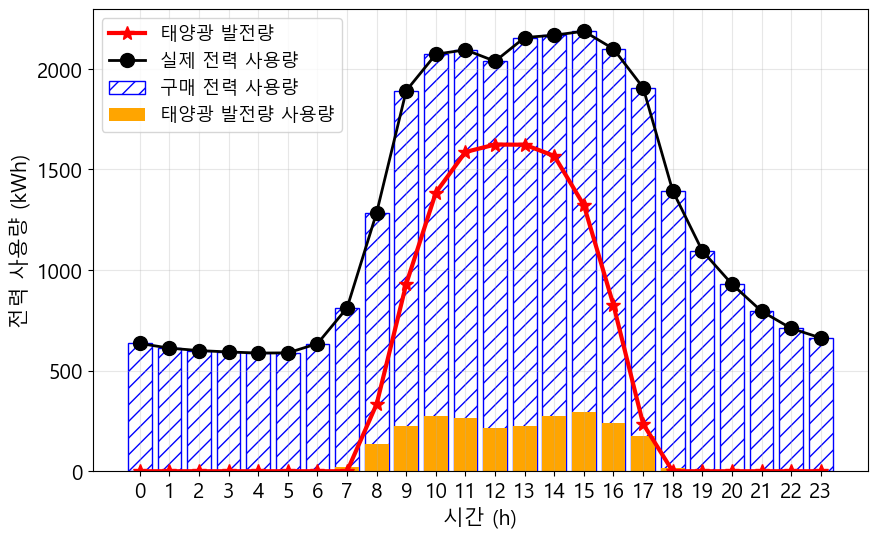

In [36]:
hours = np.arange(24)
total_power = input[input['num']==6].groupby(['hour']).mean()['전력사용량(kWh)'].values
solar_power = mc.results.ac.values
purchase_power = total_power - solar_power

plt.figure(figsize=(10, 6))
bar1 = plt.bar(hours, total_power, edgecolor='blue', hatch='//', color='white', label='구매 전력 사용량')  # 전체 전력 사용량 막대
bar2 = plt.bar(hours, df_results.loc[53]['BestPosition'],  color = 'orange',label='태양광 발전량 사용량')  
line = plt.plot(solar_power, linewidth = 3, color = 'r', marker = '*',markersize = 10, label = '태양광 발전량')
line2 = plt.plot(total_power, linewidth = 2, color = 'k', marker = 'o', markersize = 10, label = '실제 전력 사용량')

plt.legend(fontsize = 13)
plt.xlabel('시간 (h)', fontsize = 15)
plt.ylabel('전력 사용량 (kWh)', fontsize = 15)
plt.xticks(hours, fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(alpha = 0.3)

plt.show()
